In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, time
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")



In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')


In [3]:
merge = pd.read_csv('./data/df_merged.csv')

In [4]:
merge

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimate_delivery_time_diff,delivery_time,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,2 days 08:47:45,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,3,"credit_card, voucher",1,38.71
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,9 days 06:37:19,0 days 23:57:27,...,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,-23.574809,-46.587471,1,credit_card,2,223.38
2,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,9 days 04:39:40,0 days 09:38:50,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,1,credit_card,1,44.11
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,9 days 09:15:17,1 days 19:23:17,...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.565578,-46.534603,1,credit_card,3,37.77
4,ded23d37cdcc25b37b4473b7be770cb2,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20,12 days 11:47:37,6 days 12:02:34,...,806ab9e6d7c897da7e3b6104dadadc34,3366,sao paulo,SP,-23.565578,-46.534603,1,boleto,1,102.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97075,fc703730f6206ec478cae91c89f7dcb3,d99700792f0811f23d94f2edb64634f8,delivered,2018-07-28 18:01:11,2018-07-28 18:15:14,2018-07-30 14:06:00,2018-08-06 16:41:43,2018-08-15,8 days 07:18:17,1 days 19:50:46,...,8b8c8f067a3faaf116211277147a88de,35494,desterro de entre rios,MG,-20.657355,-44.340017,1,credit_card,1,58.28
97076,f1a1942c32bd91ad8368164ae571b8f7,9632f1ff07591588a9596b99f8515c03,delivered,2018-04-16 20:51:56,2018-04-17 20:51:45,2018-04-19 19:54:43,2018-04-30 15:43:45,2018-05-16,15 days 08:16:15,1 days 23:02:58,...,1ef6a1d949703afd7a74347aed3b0503,77413,gurupi,TO,-11.743299,-49.048090,1,credit_card,3,59.03
97077,ff64e0ba4800eb1127ac32aeac2b51f9,16482587049b0c2a607dd532d0653696,delivered,2017-11-20 16:46:51,2017-11-20 16:56:23,2017-11-24 15:39:15,2017-12-05 00:57:57,2017-12-13,7 days 23:02:03,3 days 22:42:52,...,ebc6df639d125e446f07c0e9b1e47b90,32250,contagem,MG,-19.967817,-44.048033,1,credit_card,7,148.47
97078,ada8de3a9486cea2fce7f4b00319cf3c,9065a96b91a08c08755c4ea2618884f2,delivered,2018-07-09 18:25:16,2018-07-11 03:26:03,2018-07-11 12:12:00,2018-07-24 21:22:15,2018-08-06,12 days 02:37:45,0 days 08:45:57,...,ed81a42bec90c87578108d2e4c742d20,44798,umburanas,BA,-10.728517,-41.324377,1,boleto,1,123.75


In [5]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97080 entries, 0 to 97079
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       97080 non-null  object 
 1   customer_id                    97080 non-null  object 
 2   order_status                   97080 non-null  object 
 3   order_purchase_timestamp       97080 non-null  object 
 4   order_approved_at              97080 non-null  object 
 5   order_delivered_carrier_date   97080 non-null  object 
 6   order_delivered_customer_date  97080 non-null  object 
 7   order_estimated_delivery_date  97080 non-null  object 
 8   estimate_delivery_time_diff    97080 non-null  object 
 9   delivery_time                  97080 non-null  object 
 10  product_id                     97080 non-null  object 
 11  seller_id                      97080 non-null  object 
 12  price                          97080 non-null 

In [6]:
merge.nunique()

order_id                         93507
customer_id                      93507
order_status                         1
order_purchase_timestamp         93014
order_approved_at                85943
order_delivered_carrier_date     77876
order_delivered_customer_date    92741
order_estimated_delivery_date      444
estimate_delivery_time_diff      89217
delivery_time                    83906
product_id                       31253
seller_id                         2902
price                             5738
freight_value                     6859
order_count                         16
product_category_name               71
product_weight_g                  2157
product_length_cm                   99
product_height_cm                  102
product_width_cm                    94
customer_unique_id               90528
customer_zip_code_prefix         14650
customer_city                     4012
customer_state                      27
customer_lat                     14646
customer_lng             

# R

- 가장 최근 일자를 기준으로 하여 각 고객별 r을 구해, 기준일까지 얼마나 지났는가를 구함 

In [7]:
recency = merge.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()

In [8]:
recency.rename(columns={'order_purchase_timestamp':'recency'},inplace=True)

In [9]:
max_date = recency['recency'].max()
max_date

'2018-08-29 15:00:37'

In [10]:
recency 

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
90523,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
90524,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
90525,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
90526,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [11]:
recency.recency =pd.to_datetime(recency.recency )

In [12]:
max_date=pd.to_datetime(max_date)

In [13]:
recency['diff_date'] = (max_date - recency['recency']).dt.days # dt.days : 시간 없이 날짜만 남기기

In [14]:
recency 

,customer_unique_id,recency,diff_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,320
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,287
...,...,...,...
90523,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,446
90524,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,261
90525,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,567
90526,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,118


In [15]:
recency['diff_date'].describe()

count    90528.000000
mean       238.218231
std        152.388604
min          0.000000
25%        114.000000
50%        220.000000
75%        347.000000
max        694.000000
Name: diff_date, dtype: float64

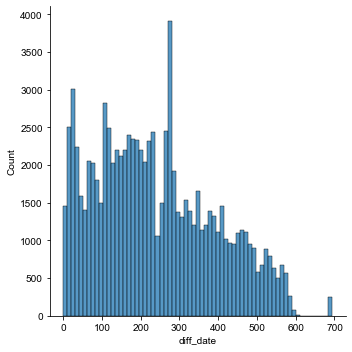

In [16]:
sns.displot(recency['diff_date'])

In [17]:
recency['diff_date']=recency['diff_date'].astype('int')

count,bin_divers = np.histogram(recency['diff_date'], bins=5)
print(bin_divers)

[  0.  138.8 277.6 416.4 555.2 694. ]


In [18]:
bin_names = [5,4,3,2,1]

recency['r_score'] = pd.cut (x=recency['diff_date'],
                       bins=bin_divers,
                        labels = bin_names,
                        include_lowest=True
                       )

print(recency[['diff_date','r_score']].head(10))

   diff_date r_score
0        111       5
1        114       5
2        536       2
3        320       3
4        287       3
5        145       4
6        131       5
7        182       4
8        542       2
9        169       4


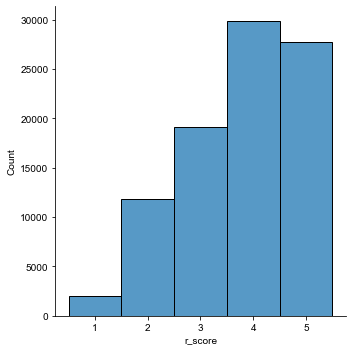

In [19]:
sns.displot(recency['r_score'])

# F

- frequency 점수의 분포를 살펴봤을 때, 1회 또는 2회만 구매한 고객이 너무 많아서 pd.qcut() 함수가 적용이 불가능하다는 것을 알게 되었습니다. 그렇기 때문에 F 점수는 나머지와 다르게 1회 구매했으면 1점, 2회 구매했으면 2점, 3회 구매했으면 3점, 4회 구매했으면 4점, 그 이상 구매했으면 5점을 부여하는 함수를 만들어 적용했습니다.

In [20]:
frequency = merge.groupby('customer_unique_id')['order_purchase_timestamp'].nunique().reset_index()

In [21]:
frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90528 entries, 0 to 90527
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_unique_id        90528 non-null  object
 1   order_purchase_timestamp  90528 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [22]:
frequency.rename(columns={'order_purchase_timestamp':'frequency'},inplace=True)

In [23]:
frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
90523,fffcf5a5ff07b0908bd4e2dbc735a684,1
90524,fffea47cd6d3cc0a88bd621562a9d061,1
90525,ffff371b4d645b6ecea244b27531430a,1
90526,ffff5962728ec6157033ef9805bacc48,1


In [24]:
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)
    
frequency['f_score'] = frequency['frequency'].apply(parse_values)

In [25]:
frequency.nunique()

customer_unique_id    90528
frequency                 9
f_score                   5
dtype: int64

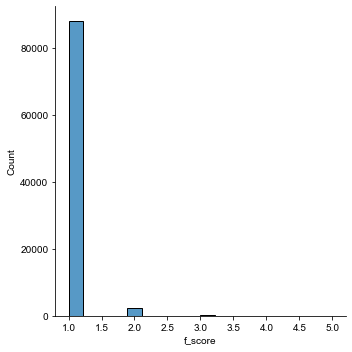

In [26]:
sns.displot(frequency['f_score'])

# M

In [27]:
monetary = merge.groupby('customer_unique_id')['payment_value'].sum().reset_index()

In [28]:
monetary.rename(columns={'payment_value':'monetary'},inplace=True)

In [29]:
count,bin_divers = np.histogram(monetary['monetary'], bins=5)
print(bin_divers)

[9.5900000e+00 3.2034020e+03 6.3972140e+03 9.5910260e+03 1.2784838e+04
 1.5978650e+04]


In [30]:
bin_names = [1,2,3,4,5]

monetary ['m_score'] = pd.cut (x=monetary['monetary'],
                       bins=bin_divers,
                        labels = bin_names,
                        include_lowest=True
                       )

print(monetary [['m_score','monetary']].head(10))

  m_score  monetary
0       1    141.90
1       1     27.19
2       1     86.22
3       1     43.62
4       1    196.89
5       1    166.98
6       1     35.38
7       1    838.36
8       1    150.12
9       1    129.76


In [31]:
monetary.monetary.describe()

count    90528.000000
mean       175.842174
std        265.479403
min          9.590000
25%         63.157500
50%        108.810000
75%        188.410000
max      15978.650000
Name: monetary, dtype: float64

In [32]:
monetary.m_score.value_counts()

1    90462
2       54
3       10
5        2
4        0
Name: m_score, dtype: int64

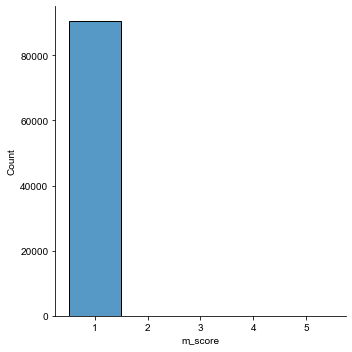

In [33]:
sns.displot(monetary['m_score'] )

# RFM merge

In [34]:
# recency, frequency, monetary 데이터프레임 하나로 합치기
rfm_score = recency.merge(frequency, on = 'customer_unique_id')
rfm_score = rfm_score.merge(monetary, on = 'customer_unique_id')

# rfm_score을 합치기 위해 string으로 형 변환
rfm_score['r_score'] = rfm_score['r_score'].astype(str)
rfm_score['f_score'] = rfm_score['f_score'].astype(str)
rfm_score['m_score'] = rfm_score['m_score'].astype(str)

# rfm_score 합치기
rfm_score['rfm_score'] = rfm_score['r_score'] + rfm_score['f_score'] + rfm_score['m_score']

In [35]:
rfm_score

,customer_unique_id,recency,diff_date,r_score,frequency,f_score,monetary,m_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111,5,1,1,141.90,1,511
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114,5,1,1,27.19,1,511
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536,2,1,1,86.22,1,211
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,320,3,1,1,43.62,1,311
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,287,3,1,1,196.89,1,311
...,...,...,...,...,...,...,...,...,...
90523,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,446,2,1,1,4134.84,2,212
90524,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,261,4,1,1,84.58,1,411
90525,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,567,1,1,1,112.46,1,111
90526,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,118,5,1,1,133.69,1,511


In [36]:
segments = {
    r'111|112|121|131|141|151' : '이탈 고객',
    r'332|322|233|232|223|222|132|123|122|212|211' : '동면 고객', 
    r'155|154|144|214|215|115|114|113' : '놓치면 안 될 고객',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124' : '이탈 우려 고객',
    r'331|321|312|221|213|231|241|251' : '휴면 예정 고객',
    r'535|534|443|434|343|334|325|324' : '관심 필요 고객',
    r'525|524|523|515|514|513|425|424|413|414|415|315|314|313' : '잠재 고객',
    r'522|521|512|511|422|421|412|411|311' : '신규 고객',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323' : '잠재 충성 고객',
    r'543|444|435|355|354|345|344|335' : '충성 고객',
    r'555|554|544|545|454|455|445' : 'VIP 고객'
}

rfm_score['segment'] = rfm_score['rfm_score'].replace(segments, regex=True)

In [37]:
rfm_score

,customer_unique_id,recency,diff_date,r_score,frequency,f_score,monetary,m_score,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111,5,1,1,141.90,1,511,신규 고객
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114,5,1,1,27.19,1,511,신규 고객
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536,2,1,1,86.22,1,211,동면 고객
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,320,3,1,1,43.62,1,311,신규 고객
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,287,3,1,1,196.89,1,311,신규 고객
...,...,...,...,...,...,...,...,...,...,...
90523,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,446,2,1,1,4134.84,2,212,동면 고객
90524,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,261,4,1,1,84.58,1,411,신규 고객
90525,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,567,1,1,1,112.46,1,111,이탈 고객
90526,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,118,5,1,1,133.69,1,511,신규 고객


In [38]:
conditions = [
    rfm_score["segment"] == "VIP 고객",
    rfm_score["segment"] == "충성 고객",
    rfm_score["segment"] == "잠재 충성 고객",
    rfm_score["segment"] == "신규 고객",
    rfm_score["segment"] == "잠재 고객",
    rfm_score["segment"] == "관심 필요 고객",
    rfm_score["segment"] == "휴면 예정 고객",
    rfm_score["segment"] == "이탈 우려 고객",
        rfm_score["segment"] == "놓치면 안 될 고객",
        rfm_score["segment"] == "동면 고객",
        rfm_score["segment"] == "이탈 고객",
]
values = ["다이아몬드", "다이아몬드", "다이아몬드", "골드", "골드", "골드", "실버", "실버", "실버", "브론즈", "브론즈"]

rfm_score["고객등급"] = np.select(conditions, values, default="")

In [39]:
rfm_score

,customer_unique_id,recency,diff_date,r_score,frequency,f_score,monetary,m_score,rfm_score,segment,고객등급
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111,5,1,1,141.90,1,511,신규 고객,골드
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114,5,1,1,27.19,1,511,신규 고객,골드
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536,2,1,1,86.22,1,211,동면 고객,브론즈
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,320,3,1,1,43.62,1,311,신규 고객,골드
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,287,3,1,1,196.89,1,311,신규 고객,골드
...,...,...,...,...,...,...,...,...,...,...,...
90523,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,446,2,1,1,4134.84,2,212,동면 고객,브론즈
90524,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,261,4,1,1,84.58,1,411,신규 고객,골드
90525,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,567,1,1,1,112.46,1,111,이탈 고객,브론즈
90526,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,118,5,1,1,133.69,1,511,신규 고객,골드


# 시각화

- 각 지표별 갯수 

In [40]:
rfm_score["r_score"].value_counts()

4    29853
5    27699
3    19093
2    11870
1     2013
Name: r_score, dtype: int64

In [41]:
rfm_score["m_score"].value_counts()

1    90462
2       54
3       10
5        2
Name: m_score, dtype: int64

In [42]:
rfm_score["f_score"].value_counts()

1    88076
2     2261
3      148
4       28
5       15
Name: f_score, dtype: int64

In [43]:
rfm_score["고객등급"].value_counts()

골드       76011
브론즈      13649
실버         725
다이아몬드      143
Name: 고객등급, dtype: int64

In [53]:
rfm_score["segment"].value_counts()

신규 고객         76003
동면 고객         11637
이탈 고객          2012
휴면 예정 고객        724
잠재 충성 고객        143
잠재 고객             8
놓치면 안 될 고객        1
Name: segment, dtype: int64

In [44]:
a=rfm_score["segment"].value_counts()

Text(0, 0.5, 'count')

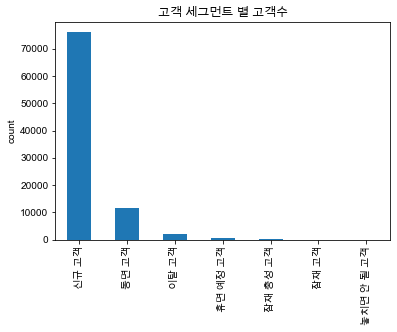

In [45]:
a.plot(kind='bar')
plt.title('고객 세그먼트 별 고객수')
plt.ylabel("count")

- 신규고객으로 분류된 고객 수가 많다는것을 확인

In [46]:
b=rfm_score["고객등급"].value_counts()

Text(0, 0.5, 'count')

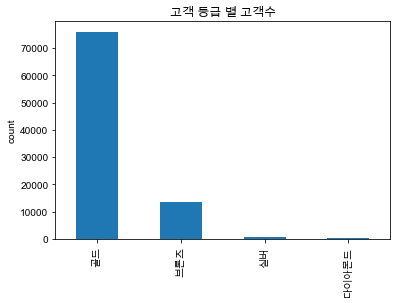

In [47]:
rfm_score["고객등급"].value_counts().plot(kind='bar')
plt.title('고객 등급 별 고객수')
plt.ylabel("count")

In [48]:
rfm_score[["고객등급","segment"]].value_counts()

고객등급   segment   
골드     신규 고객         76003
브론즈    동면 고객         11637
       이탈 고객          2012
실버     휴면 예정 고객        724
다이아몬드  잠재 충성 고객        143
골드     잠재 고객             8
실버     놓치면 안 될 고객        1
dtype: int64

<AxesSubplot:xlabel='고객등급,segment'>

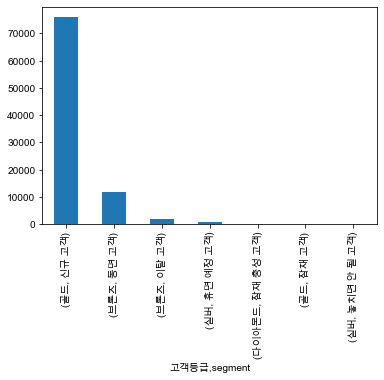

In [50]:
rfm_score[["고객등급","segment"]].value_counts().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='고객등급', ylabel='count'>

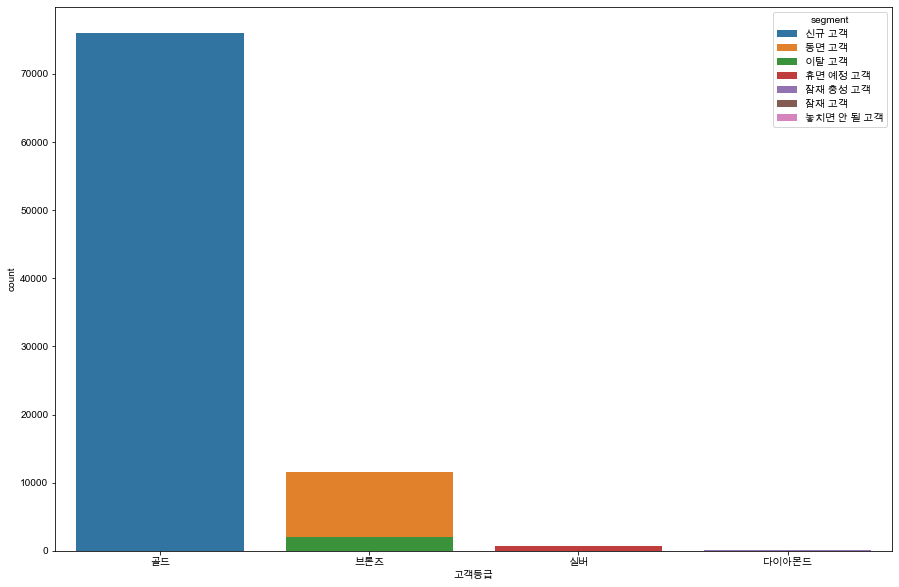

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(x='고객등급',hue='segment',data=rfm_score,dodge=False)